<a href="https://colab.research.google.com/github/SantoshMahara/Boosting_Technique_/blob/main/Adaboost_on_CensusData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project: Census Income**#

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [ ]:
df = pd.read_csv('census-income-data.csv',na_values = '?',skipinitialspace=True)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Checking the population for income

In [ ]:
df['annual_income'].value_counts()

<=50K    24720
>50K      7841
Name: annual_income, dtype: int64

Inference: 24720 people are having the income more that $50k

**Information about the dataset**

* Brief of the data
* Stats about the data

Difference between describe and info, describe is used for stats data, whereas the info is used for general overview

In [ ]:
df.info()  # target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Inferences:
* There are no null value
* There exists 6 numerical columns and 9 catergorical features

**Assumption: Age, Capital Loss & gain, hours per week, education, occupation these are some that columns that can relate with income**

Stats data for the dataset

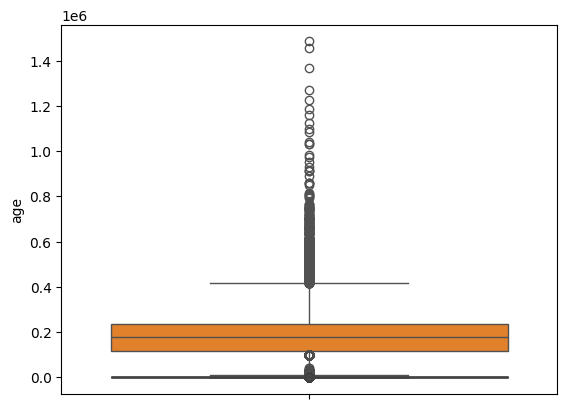

In [ ]:
col_list = list(df.columns)


for col in col_list:
  if ((df[col].dtypes == 'int64')| (df[col].dtypes == 'float64')):
    sns.boxplot(df[col])


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Insights:
* The average age of a person: 38
* THe average working hour: 40
* Assumption: As we saw that mean and median for hours-per-week are nearly same, so it can form a normal dist

**How many countries are there in the dataset?**

In [ ]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df['native-country'].nunique()

41

**Imputing the NUll values**

In [ ]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

Second way by dropping them out

In [ ]:
df.isnull().sum().sum()

4262

Size of the dataset

In [ ]:
df.shape

(32561, 15)

Points to consider for the dropping the data

* IF the null data is less than 30% of entire data --> YOU CAN DROP

* If not --> FILL THEM

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

**Duplicates Detection**

In [ ]:
df.duplicated().sum()

23

In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

**Outliers Detection**

{'whiskers': [<matplotlib.lines.Line2D at 0x788748c26680>,
 'caps': [<matplotlib.lines.Line2D at 0x788748c26bc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x788748c263e0>],
 'medians': [<matplotlib.lines.Line2D at 0x788748c27100>],
 'fliers': [<matplotlib.lines.Line2D at 0x788748c273a0>],
 'means': []}

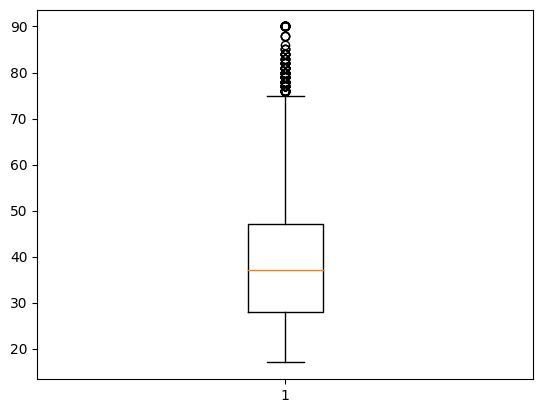

In [ ]:
# check the outliers
plt.boxplot(df['age'])

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

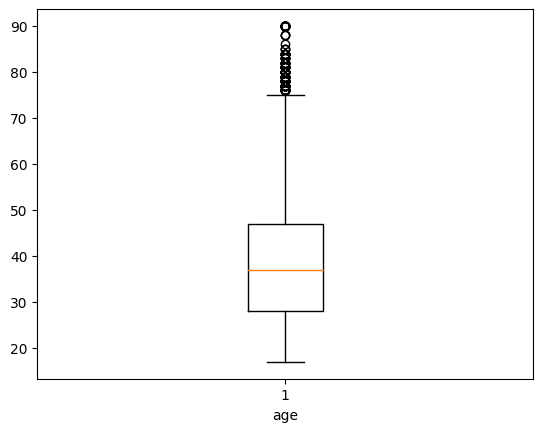

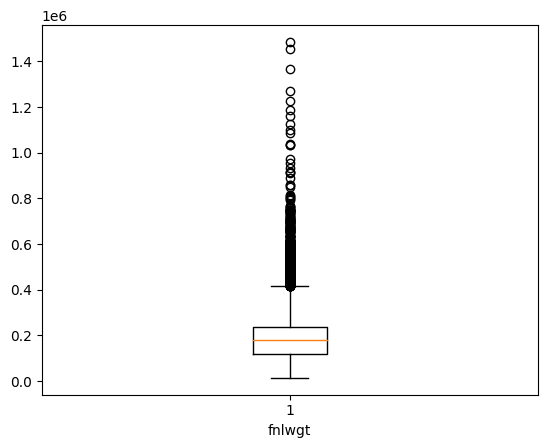

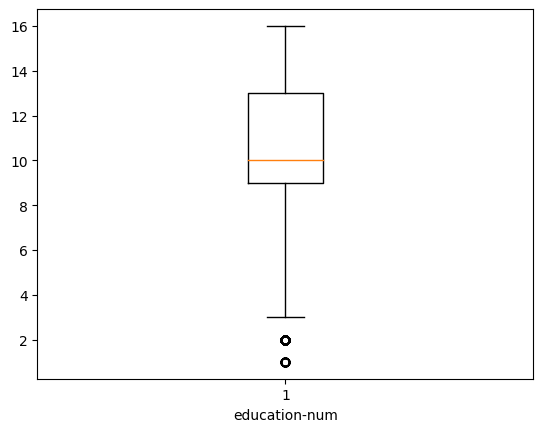

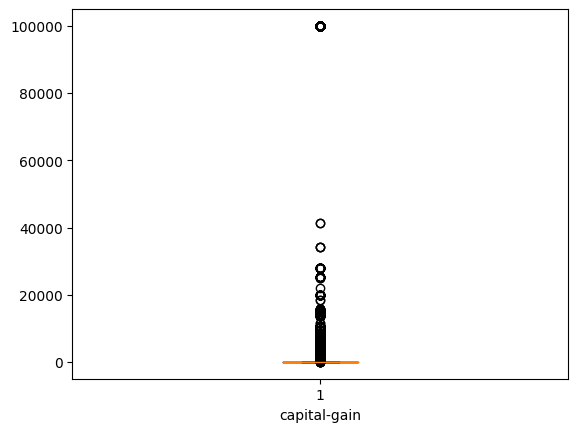

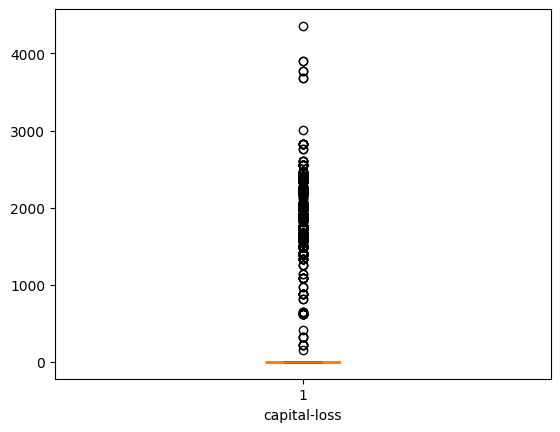

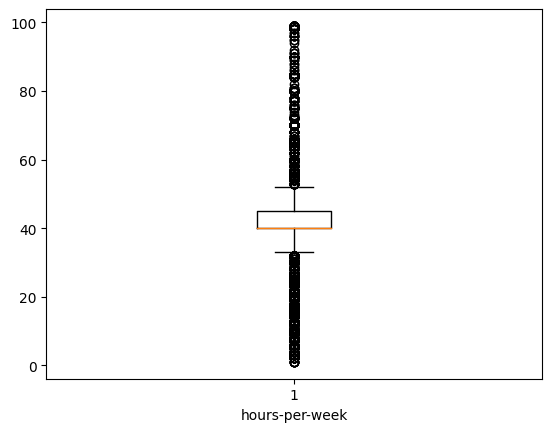

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

Inference: Nearly all the columns are needed to be treated, since each one of them are having outliers

In [ ]:
df['capital-gain'].value_counts()

0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capital-gain, Length: 118, dtype: int64

Treatment

In [ ]:
out_col = ['hours-per-week', 'age', 'fnlwgt', 'education-num']

In [ ]:
# treatment
for col in out_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  # Define my IQR
  IQR = Q3 - Q1
  # Defining my limits / whiskers
  LW = Q1 - 1.5*IQR  # lower limit / lower whisker
  UW = Q3 + 1.5*IQR
  # formulation
  df = df[(df[col]>=LW) & (df[col]<=UW)]

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
list(df['occupation'].unique())

['Adm-clerical',
 'Handlers-cleaners',
 'Prof-specialty',
 'Exec-managerial',
 'Sales',
 'Transport-moving',
 'Farming-fishing',
 'Machine-op-inspct',
 'Tech-support',
 'Craft-repair',
 'Protective-serv',
 'Other-service',
 'Armed-Forces',
 'Priv-house-serv']

{'whiskers': [<matplotlib.lines.Line2D at 0x788746811a50>,
 'caps': [<matplotlib.lines.Line2D at 0x788746811f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7887468117b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7887468124d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x788746812770>],
 'means': []}

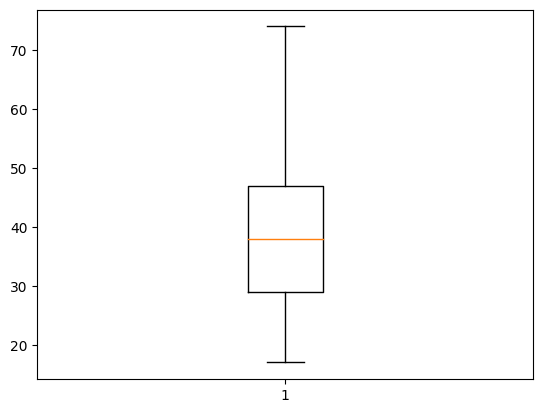

In [ ]:
plt.boxplot(df['age'])

#**Encoding**#

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
cat_feat = df.select_dtypes( include = object)
cat_feat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,annual_income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [ ]:
for col in cat_feat:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
7,52,4,209642,10,9,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,11,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,8,13,2,3,0,4,1,5178,0,40,38,1
11,30,5,141297,8,13,2,9,0,1,1,0,0,40,18,1
13,32,2,205019,6,12,4,11,1,2,1,0,0,50,38,0


Check the correlation

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
age,1.000000,0.054801,-0.068388,-0.022298,0.026731,-0.281566,0.002424,-0.203215,0.016829,0.062879,0.086223,0.057467,0.049340,0.003766,0.253455
workclass,0.054801,1.000000,-0.023057,0.005326,0.028833,-0.023238,0.020683,-0.050598,0.043463,0.057971,0.035926,0.002566,0.056960,0.005843,0.008580
fnlwgt,-0.068388,-0.023057,1.000000,-0.019942,-0.030332,0.032134,0.003901,0.003666,-0.007550,0.020330,-0.004023,-0.004238,-0.012440,-0.063638,-0.001229
education,-0.022298,0.005326,-0.019942,1.000000,0.309541,-0.022699,-0.038120,0.011597,0.013070,-0.037144,0.023373,0.012371,0.036488,0.082713,0.066853
education-num,0.026731,0.028833,-0.030332,0.309541,1.000000,-0.020125,0.111054,-0.065168,0.027975,-0.017031,0.107269,0.073773,0.141280,0.059358,0.326376
marital-status,-0.281566,-0.023238,0.032134,-0.022699,-0.020125,1.000000,0.019133,0.139475,-0.076098,-0.080365,-0.033305,-0.028641,-0.081887,-0.026453,-0.164366
occupation,0.002424,0.020683,0.003901,-0.038120,0.111054,0.019133,1.000000,-0.072515,0.002035,0.082909,0.018625,0.019498,0.063999,-0.005640,0.066148
relationship,-0.203215,-0.050598,0.003666,0.011597,-0.065168,0.139475,-0.072515,1.000000,-0.124980,-0.593484,-0.045762,-0.064212,-0.179349,-0.015718,-0.236874
race,0.016829,0.043463,-0.007550,0.013070,0.027975,-0.076098,0.002035,-0.124980,1.000000,0.102075,0.014242,0.023689,0.093851,0.137421,0.074122
sex,0.062879,0.057971,0.020330,-0.037144,-0.017031,-0.080365,0.082909,-0.593484,0.102075,1.000000,0.038308,0.050530,0.179627,0.005974,0.210854


<Axes: >

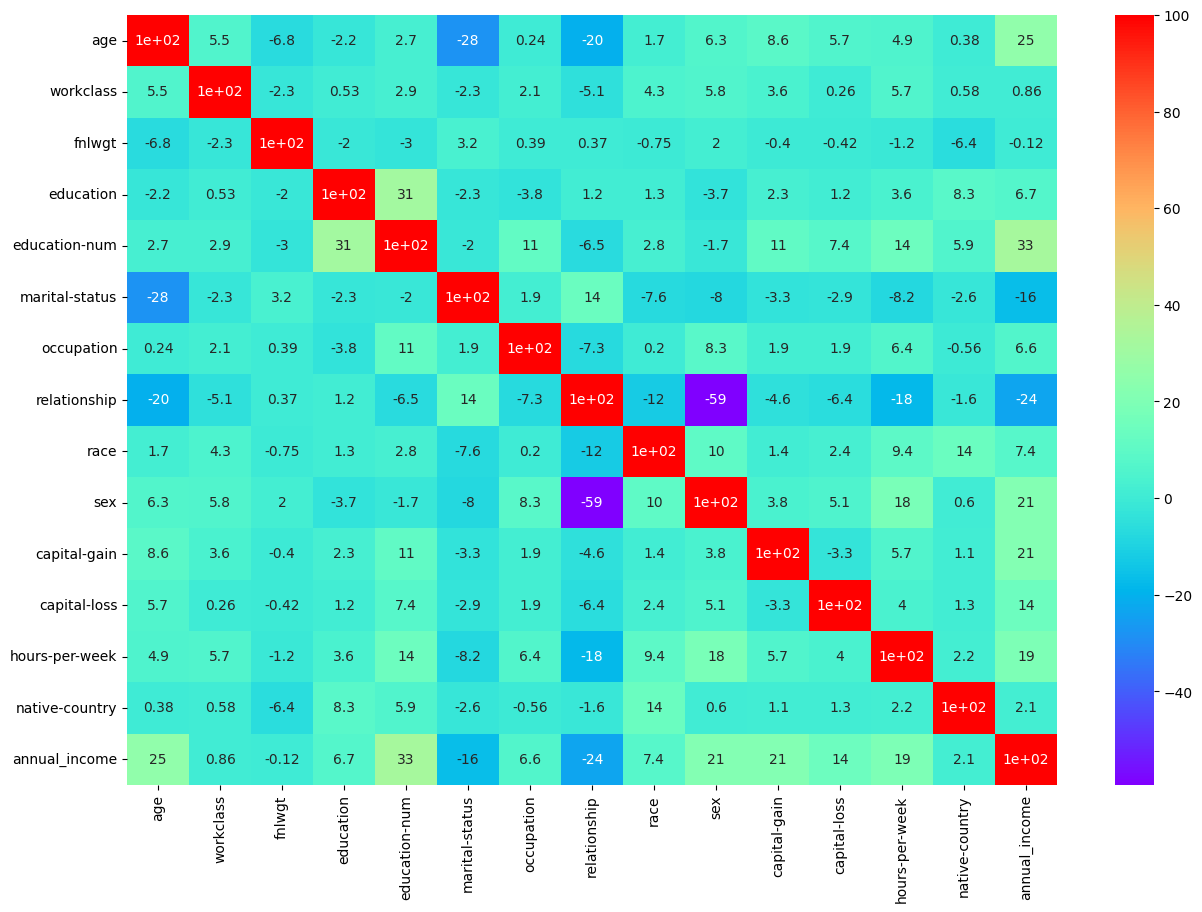

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr()*100, cmap = 'rainbow', annot=True)

**Model Building and Evaluation Phase**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 1: Determining the features and the target columns

In [ ]:
x = df.iloc[:, :-1]
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [ ]:
y = df['annual_income']
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: annual_income, Length: 21309, dtype: int64

Step 2: Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [ ]:
x_train.shape, y_test.shape

((14916, 14), (6393,))

**LOGISTIC REGRESSION**

USing CM:
* USe the right diagonal to evaluate the accuracy
*Use the left diagonal to evaluate the misclassified data

In [ ]:
from sklearn.linear_model import *
clf = LogisticRegression()

In [ ]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(f"The overall accuracy of the data on performing LR: {accuracy_score(y_pred, y_test)}")

The overall accuracy of the data on performing LR: 0.7864852182074143


In [ ]:
# FOR TRAIN DATA

y_pred_train = clf.predict(x_train)
print(f"The overall accuracy of the data on performing LR: {accuracy_score(y_pred_train, y_train)}")

The overall accuracy of the data on performing LR: 0.9145213193885761


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
# train
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# test
pred = clf.predict(x_test)

In [ ]:
print(f"The overall accuracy of the data on performing Decision Tree: {accuracy_score(pred, y_test)}")

The overall accuracy of the data on performing Decision Tree: 0.7924292194587831


In [ ]:
print(confusion_matrix(pred, y_test))

[[4034  626]
 [ 701 1032]]


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
# train
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# test
pred = clf.predict(x_test)

In [ ]:
print(f"The overall accuracy of the data on performing Random Forest Classifier: {accuracy_score(pred, y_test)}")

The overall accuracy of the data on performing Random Forest Classifier: 0.8409197559831065


In [ ]:
print(confusion_matrix(pred, y_test))

[[4338  620]
 [ 397 1038]]


In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      4958
           1       0.63      0.72      0.67      1435

    accuracy                           0.84      6393
   macro avg       0.77      0.80      0.78      6393
weighted avg       0.85      0.84      0.84      6393



**ADABoosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ada
clf = ada(n_estimators = 50)

In [ ]:
model = clf.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

**Performance Evaluation**

In [ ]:
from sklearn.metrics import *
print('The accuracy is: ', accuracy_score(y_pred, y_test))

The accuracy is:  0.8495229156890349


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[4396  339]
 [ 623 1035]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ada
clf1 = ada(n_estimators = 100)

model1 = clf1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

from sklearn.metrics import *
print('The accuracy is: ', accuracy_score(y_pred1, y_test))

The accuracy is:  0.8576568121382763


**XGBoost**

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier()

In [ ]:
# train
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# test
pred = clf.predict(x_test)

In [ ]:
print(f"The overall accuracy of the data on performing XGBoost: {accuracy_score(pred, y_test)}")

The overall accuracy of the data on performing XGBoost: 0.8545283904270295


In [ ]:
print(confusion_matrix(pred, y_test))

[[4353  548]
 [ 382 1110]]
